# BIAS CORRECTION OF DECADAL PREDICTIONS: Application to the ensemble of predictions

## Tools for accessing and processing climate data: Case study with R

### Herramientas para el acceso y procesamiento de datos climáticos: Caso práctico con R




------------

This worked example contains the code that reproduces part of the examples shown in the paper ["climate4R: An R-based Framework for Climate Data Access, Post-processing and Bias Correction"](https://www.sciencedirect.com/science/article/pii/S1364815218303049).

In [ ]:
options(java.parameters = "-Xmx8g")
library(loadeR)
library(transformeR)
library(visualizeR)
library(downscaleR)
library(magrittr)
library(geoprocessoR)
library(sp)
library(repr)

## Domains for the demonstrators

### Barcelona
  latLim = c(39, 44)\
  lonLim = c(-1, 4)
### Bergen
  latLim = c(58, 63)\
  lonLim = c(4, 9)
### Paris
  latLim = c(46.5, 51.5)\
  lonLim = c(-.5, 4.5)
### Prague
  latLim = c(47.5, 52.5)\
  lonLim = c(12, 17)

## 1. Data loading 

In [2]:
ncml.dir <- "../data/ncml/EC-Earth3/dcppA-hindcast/"
datasets <- list.files(ncml.dir, full.names = T) 
datasets %>% head

[1] "../data/ncml/EC-Earth3/dcppA-hindcast//s1960-r1i4p1f1_day_tas_gr_v20220322.ncml"
[2] "../data/ncml/EC-Earth3/dcppA-hindcast//s1961-r1i4p1f1_day_tas_gr_v20220322.ncml"
[3] "../data/ncml/EC-Earth3/dcppA-hindcast//s1962-r1i4p1f1_day_tas_gr_v20220322.ncml"
[4] "../data/ncml/EC-Earth3/dcppA-hindcast//s1963-r1i4p1f1_day_tas_gr_v20220322.ncml"
[5] "../data/ncml/EC-Earth3/dcppA-hindcast//s1964-r1i4p1f1_day_tas_gr_v20220322.ncml"
[6] "../data/ncml/EC-Earth3/dcppA-hindcast//s1965-r1i4p1f1_day_tas_gr_v20220322.ncml"

In [3]:
datasets <- datasets[(datasets %>% grep(pattern = "1974")) : length(datasets)] %<>% print

 [1] "../data/ncml/EC-Earth3/dcppA-hindcast//s1974-r1i4p1f1_day_tas_gr_v20220322.ncml"
 [2] "../data/ncml/EC-Earth3/dcppA-hindcast//s1975-r1i4p1f1_day_tas_gr_v20220322.ncml"
 [3] "../data/ncml/EC-Earth3/dcppA-hindcast//s1976-r1i4p1f1_day_tas_gr_v20220322.ncml"
 [4] "../data/ncml/EC-Earth3/dcppA-hindcast//s1977-r1i4p1f1_day_tas_gr_v20220322.ncml"
 [5] "../data/ncml/EC-Earth3/dcppA-hindcast//s1978-r1i4p1f1_day_tas_gr_v20220322.ncml"
 [6] "../data/ncml/EC-Earth3/dcppA-hindcast//s1979-r1i4p1f1_day_tas_gr_v20220322.ncml"
 [7] "../data/ncml/EC-Earth3/dcppA-hindcast//s1980-r1i4p1f1_day_tas_gr_v20220322.ncml"
 [8] "../data/ncml/EC-Earth3/dcppA-hindcast//s1981-r1i4p1f1_day_tas_gr_v20220322.ncml"
 [9] "../data/ncml/EC-Earth3/dcppA-hindcast//s1982-r1i4p1f1_day_tas_gr_v20220322.ncml"
[10] "../data/ncml/EC-Earth3/dcppA-hindcast//s1983-r1i4p1f1_day_tas_gr_v20220322.ncml"
[11] "../data/ncml/EC-Earth3/dcppA-hindcast//s1984-r1i4p1f1_day_tas_gr_v20220322.ncml"
[12] "../data/ncml/EC-Earth3/dcppA-hindcast

In [4]:
ncml.dir.obs <- "../data/ncml/CERRA/"
dataset.obs <- list.files(ncml.dir.obs, full.names = T) 
dataset.obs

[1] "../data/ncml/CERRA//tas_f3h-r2631x1113.ncml"

### 1.1. Data loading of the observational reference


In [5]:
o.paris.1984.2004 <- readRDS("o.paris.1984.2004.rds")

### 1.2. Data loading of decadal predictions and cration of the Multi-member ensemble of 10 lead-years

In [6]:
p.paris.m <- readRDS("p.paris.m.rds")

Quick look at the time series to illustrate the overlapping and non-overlapint time periods:

In [7]:
# Change plot size 
options(repr.plot.width=10, repr.plot.height=4)

pad applied on the interval: day

pad applied on the interval: day



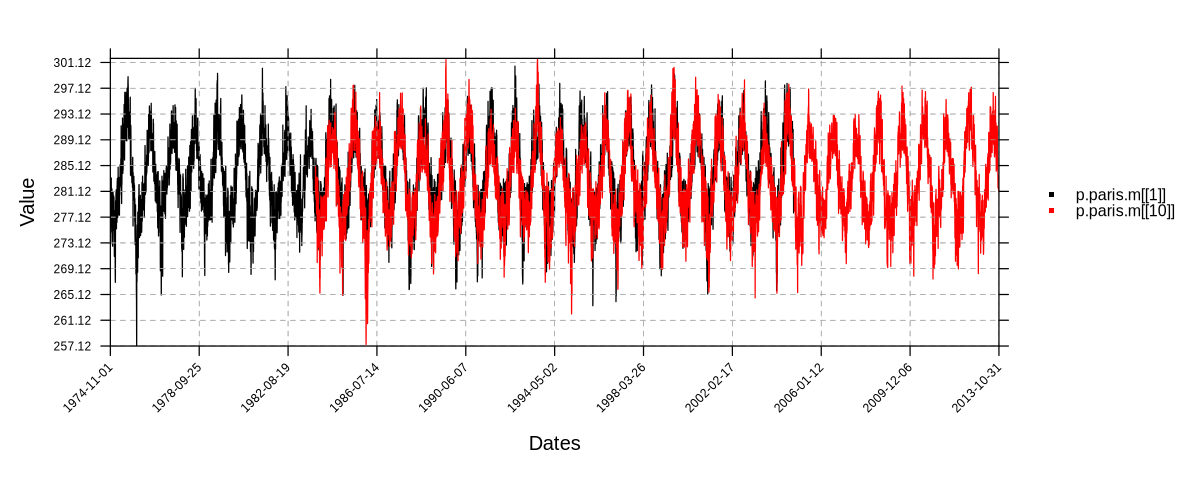

In [8]:
temporalPlot(p.paris.m[[1]], p.paris.m[[10]])

Temporal intersection of the 10 members:

In [9]:
p.paris.m.common <- intersectGrid(p.paris.m[[1]], p.paris.m[[2]], p.paris.m[[3]], p.paris.m[[4]], p.paris.m[[5]], 
                   p.paris.m[[6]], p.paris.m[[7]], p.paris.m[[8]], p.paris.m[[9]], p.paris.m[[10]], 
                   type = "temporal", 
                   which.return = 1:10)

In [10]:
p.paris.ens <- bindGrid(p.paris.m.common, dimension = "member")

pad applied on the interval: day



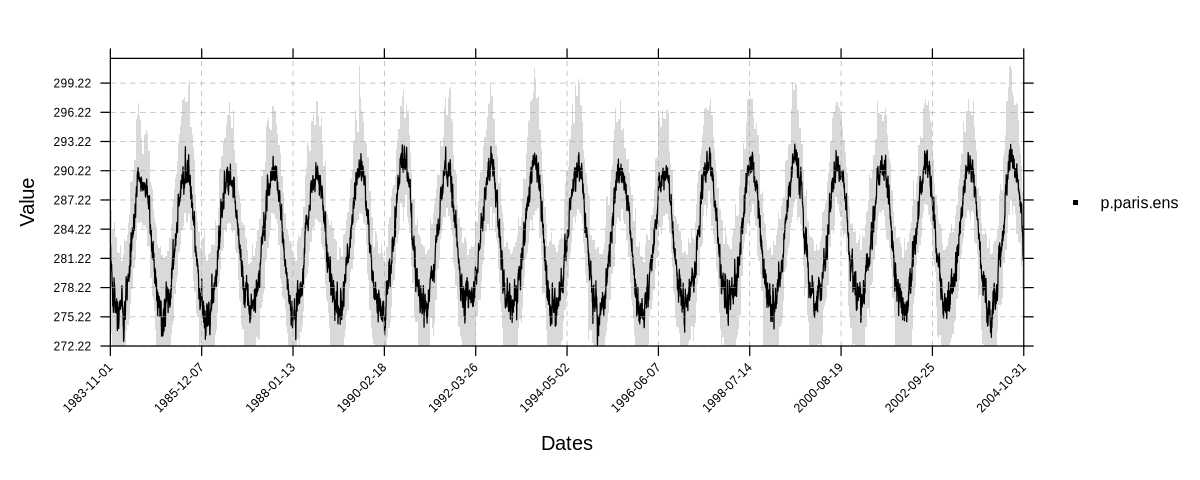

In [11]:
temporalPlot(p.paris.ens)

## 1. Bias correction of the multi-member ensemble 

In [12]:
o.paris.1984.2004 <- intersectGrid(o.paris.1984.2004, p.paris.ens, which.return = 1)
p.paris.ens <- intersectGrid(o.paris.1984.2004, p.paris.ens, which.return = 2)

 Bias correction considering the joint distribution of all members. Window option is currently not supported for joined members. To use the window option set `join.members = FALSE`. 

In [13]:
cal.eqm.ens <- readRDS("cal.eqm.ens.rds")

Daily time series:

pad applied on the interval: day

pad applied on the interval: day

pad applied on the interval: day



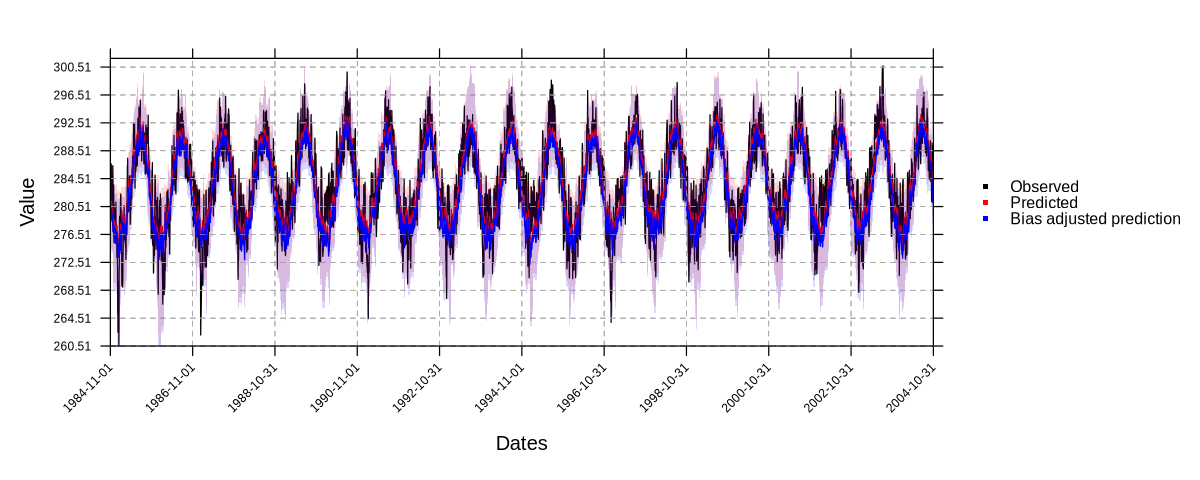

In [21]:
temporalPlot("Observed" = o.paris.1984.2004, 
             "Predicted" = cal.eqm.ens, 
             "Bias adjusted prediction" = p.paris.ens)  %>% suppressMessagess

Annual time series:

[2024-05-06 11:01:11.785151] Performing annual aggregation...

[2024-05-06 11:01:12.100181] Done.

[2024-05-06 11:01:12.14419] Performing annual aggregation...

[2024-05-06 11:01:12.446577] Done.

[2024-05-06 11:01:12.753249] Performing annual aggregation...

[2024-05-06 11:01:16.623283] Done.

pad applied on the interval: year

pad applied on the interval: year

pad applied on the interval: year



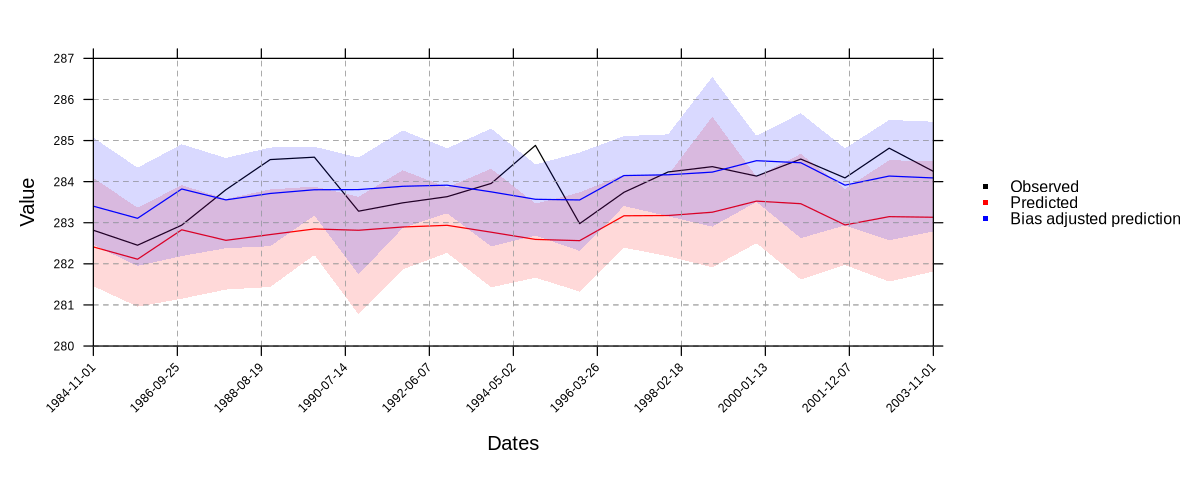

In [25]:
temporalPlot("Observed" = o.paris.1984.2004 %>% aggregateGrid(aggr.y = list(FUN = mean, na.rm = TRUE)), 
             "Predicted" = p.paris.ens %>% aggregateGrid(aggr.y = list(FUN = mean, na.rm = TRUE)),
             "Bias adjusted prediction" = cal.eqm.ens %>% aggregateGrid(aggr.y = list(FUN = mean, na.rm = TRUE)),
             xyplot.custom = list(ylim = c(280, 287))) %>% suppressMessagess

Bias correction of each member separately and using the moving window option:

In [13]:
cal.eqm.ens <- readRDS("cal.eqm.ens.2.rds")

Annual time series:

[2024-05-06 11:12:07.225512] Performing annual aggregation...

[2024-05-06 11:12:08.300974] Done.

[2024-05-06 11:12:08.347034] Performing annual aggregation...

[2024-05-06 11:12:08.628481] Done.

[2024-05-06 11:12:08.931316] Performing annual aggregation...

[2024-05-06 11:12:12.97286] Done.

pad applied on the interval: year

pad applied on the interval: year

pad applied on the interval: year



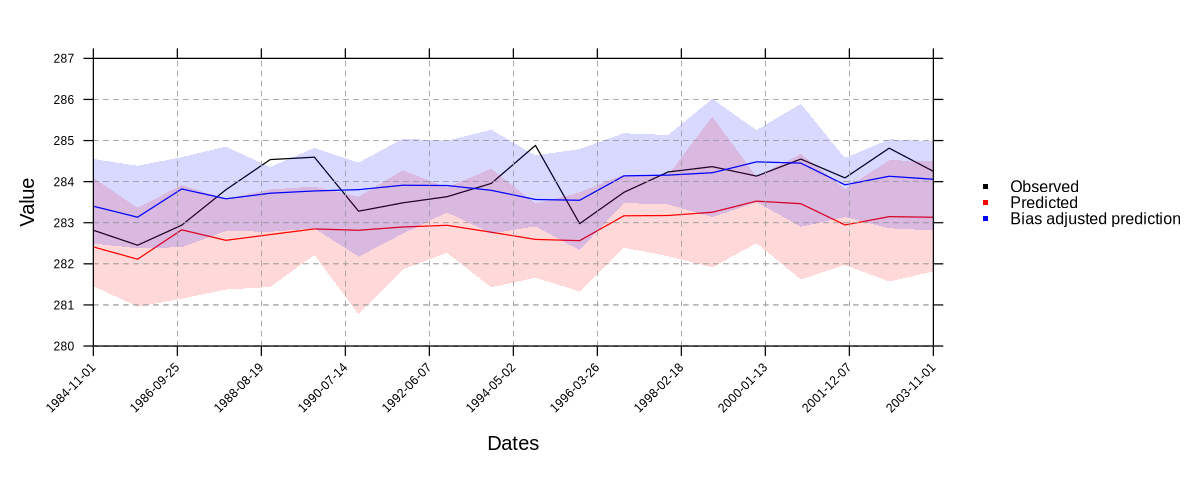

In [30]:
temporalPlot("Observed" = o.paris.1984.2004 %>% aggregateGrid(aggr.y = list(FUN = mean, na.rm = TRUE)), 
             "Predicted" = p.paris.ens %>% aggregateGrid(aggr.y = list(FUN = mean, na.rm = TRUE)),
             "Bias adjusted prediction" = cal.eqm.ens.2 %>% aggregateGrid(aggr.y = list(FUN = mean, na.rm = TRUE)),
             xyplot.custom = list(ylim = c(280, 287))) 